In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt

In [5]:
vocab_size = 10000
maxlen = 100
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words = vocab_size)

In [13]:
x_train = pad_sequences(x_train,maxlen = maxlen)
x_test = pad_sequences(x_test,maxlen = maxlen)

In [29]:
model = Sequential([
    Embedding(vocab_size,32,input_length = maxlen),
    SimpleRNN(32),
    Dense(1,activation = 'sigmoid')
])

C:\Users\AnayJoshi28\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [31]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [33]:
history = model.fit(x_train,y_train,epochs = 5,batch_size = 64,validation_split = 0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5593 - loss: 0.6798 - val_accuracy: 0.7634 - val_loss: 0.5098
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8017 - loss: 0.4382 - val_accuracy: 0.8060 - val_loss: 0.4322
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9068 - loss: 0.2502 - val_accuracy: 0.8138 - val_loss: 0.4321
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9615 - loss: 0.1286 - val_accuracy: 0.8132 - val_loss: 0.5108
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9862 - loss: 0.0523 - val_accuracy: 0.8006 - val_loss: 0.6398


In [35]:
loss , accuracy = model.evaluate(x_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7914 - loss: 0.6575


In [37]:
print(loss)
print(accuracy)

0.6505784392356873
0.7943599820137024


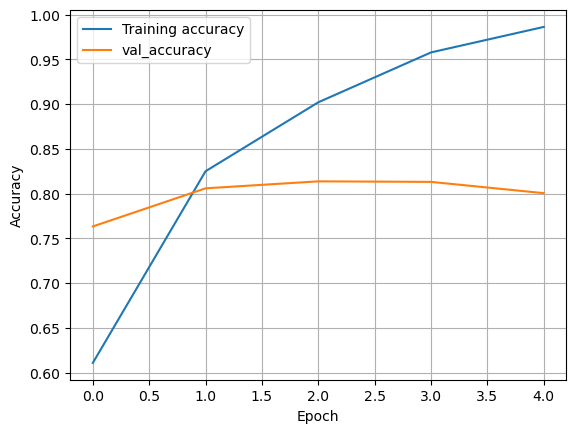

In [39]:
plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

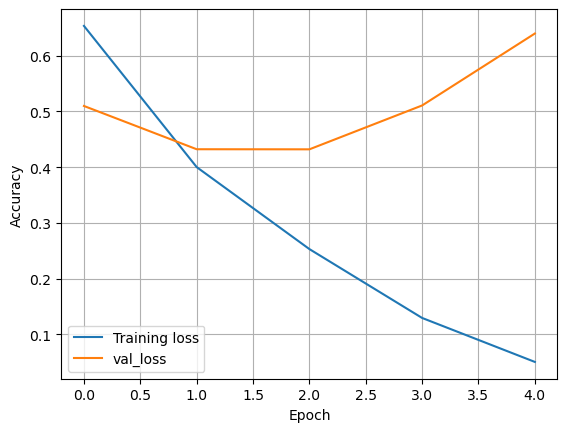

In [41]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()